In [5]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
d = None  
data = None  
with zipfile.ZipFile("./two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))float' object cannot be interpreted as an integerfloat' object cannot be interpreted as an integer

train.json


In [7]:
my_df = pd.DataFrame(d)
pd.set_option('display.max_columns', 3)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print(my_df)

        bathrooms  bedrooms                       building_id              created                                        description       display_address                                           features  latitude  listing_id  longitude                        manager_id                                             photos  price           street_address interest_level
4             1.0         1  8579a0b0d54db803821a35a4a615e97a  2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4  [https://photos.renthop.com/2/7170325_3bb5ac84...   2400      145 Borinquen Place         medium
6             1.0         2  b8e75fc949a6cd8225b455648a951712  2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   -73.9722  955db33477af4f4

In [9]:
# Find out the maximum price from dataset
maxPrice = my_df['price'].max()

# Analyze the Price data from dataset
step = 2000
priceBin =[]
for index in range(0, maxPrice+1, step):
    priceBin.append(index)

my_df['PriceInterval'] = pd.cut(my_df['price'], priceBin)
df_count = pd.value_counts(my_df.PriceInterval, sort = False)

df_count = df_count.to_frame()
df_count = df_count[(df_count.T != 0).any()]

In [10]:
# Output the list of Price data
print(df_count)

                    PriceInterval
(0, 2000]                    5309
(2000, 4000]                31287
(4000, 6000]                 8993
(6000, 8000]                 2294
(8000, 10000]                 591
(10000, 12000]                295
(12000, 14000]                218
(14000, 16000]                147
(16000, 18000]                 56
(18000, 20000]                 53
(20000, 22000]                 13
(22000, 24000]                 12
(24000, 26000]                 16
(26000, 28000]                 13
(28000, 30000]                 20
(30000, 32000]                  4
(34000, 36000]                  5
(36000, 38000]                  2
(38000, 40000]                  2
(44000, 46000]                  2
(48000, 50000]                  4
(50000, 52000]                  2
(52000, 54000]                  1
(54000, 56000]                  1
(58000, 60000]                  2
(78000, 80000]                  1
(84000, 86000]                  1
(88000, 90000]                  1
(98000, 100000

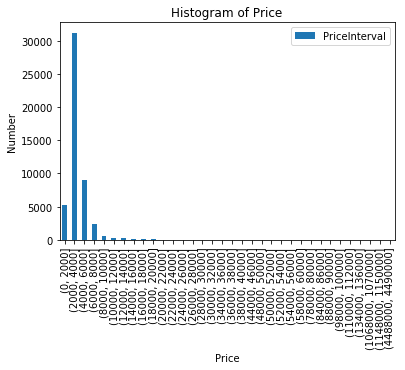

In [20]:
# Plot the histogram for Price data
df_count.plot(kind='bar', title= 'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

In [54]:
# Find out the maximum Latitude from dataset
maxLatitude = int(my_df['latitude'].max()) + 1
# Find out the maximum Latitude from dataset
minLatitude = int(my_df['latitude'].min()) - 1

# Analyze the Latitude data from dataset
step = 1
latitudeBin = []
for index in range(minLatitude, maxLatitude, step):
    latitudeBin.append(index)

my_df['latitudeInterval'] = pd.cut(my_df['latitude'], latitudeBin)
df_count = pd.value_counts(my_df.latitudeInterval, sort = False)

df_count = df_count.to_frame()
df_count = df_count[(df_count.T != 0).any()]

In [55]:
# Output the list of Latitude data
print(df_count)

          latitudeInterval
(-1, 0]                 12
(34, 35]                 1
(39, 40]                 2
(40, 41]             49312
(41, 42]                 9
(42, 43]                13
(43, 44]                 1


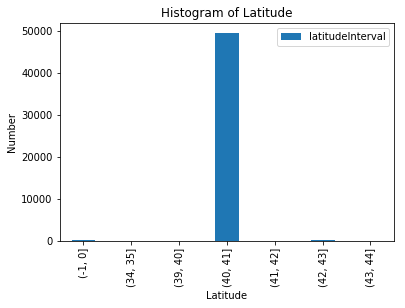

In [56]:
# Plot the histogram for Latitude data
df_count.plot(kind='bar', title= 'Histogram of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

In [57]:
# Find out the maximum Longitude from dataset
maxLongitude = int(my_df['longitude'].max()) + 1
# Find out the maximum Longitude from dataset
minLongitude = int(my_df['longitude'].min()) - 1

# Analyze the Longitude data from dataset
step = 1
longitudeBin =[]
for index in range(minLongitude, maxLongitude, step):
    longitudeBin.append(index)

my_df['longitudeInterval'] = pd.cut(my_df['longitude'], longitudeBin)
df_count = pd.value_counts(my_df.longitudeInterval, sort = False)

df_count = df_count.to_frame()
df_count = df_count[(df_count.T != 0).any()]

In [58]:
# Output the list of Longitude data
print(df_count)

              longitudeInterval
(-119, -118]                  1
(-94, -93]                    1
(-88, -87]                    1
(-87, -86]                    1
(-77, -76]                    1
(-76, -75]                    2
(-75, -74]                 7185
(-74, -73]                42136
(-73, -72]                    1
(-72, -71]                    7
(-71, -70]                    4
(-1, 0]                      12


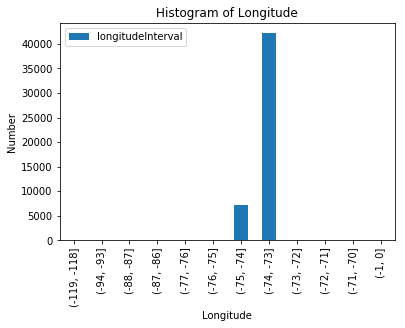

In [59]:
# Plot the histogram for Longitude data
df_count.plot(kind='bar', title= 'Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number')
plt.show()

In [64]:
# Analyze the time data from created dataset
timebins = []
for time_index in range(24):
    timebins.append(time_index)
hours = pd.to_datetime(my_df['created'])
hours = hours.dt.hour

# Fine out the top 5 busiest hours 
my_df['TimeInterval'] = pd.cut(hours, timebins)
hour_count = pd.value_counts(my_df.TimeInterval).head()

In [65]:
# Output the list of Time data with the top 5 busiest hours
print(hour_count)

(1, 2]    10596
(2, 3]     8318
(4, 5]     7954
(0, 1]     5749
(3, 4]     5021
Name: TimeInterval, dtype: int64


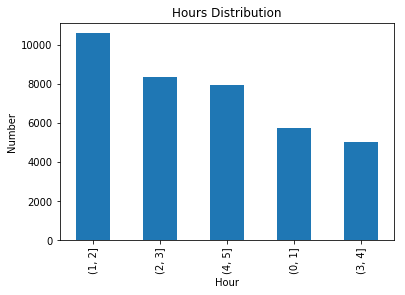

In [66]:
# Plot the histogram for Time data with the top 5 busiest hours
hour_count.plot(kind='bar', title= 'Hours Distribution')
plt.xlabel('Hour')
plt.ylabel('Number')
plt.show()

In [ ]:
# Find out the maximum Longitude from dataset
maxLongitude = int(my_df['longitude'].max() * 1000)
# Find out the maximum Longitude from dataset
minLongitude = int(my_df['longitude'].min() * 1000)

# Analyze the Longitude data from dataset
step = 50
longitudeBin =[]
for index in range(minLongitude, maxLongitude, step):
    longitudeBin.append(index)

my_df['longitudeInterval'] = pd.cut(my_df['longitude'] * 1000, longitudeBin)
df_count = pd.value_counts(my_df.longitudeInterval, sort = False)

df_count = df_count.to_frame()
df_count = df_count[(df_count.T != 0).any()]